In [1]:
import re
import os
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from sklearn import metrics
import jieba
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from gensim.models import Word2Vec
from sklearn.tree import DecisionTreeClassifier
from tqdm.notebook import tqdm

f:\python\python37\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# display the chinese character
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 

In [3]:
train = pd.read_csv('./cache/train.csv', index_col=0)
test = pd.read_csv('./cache/test.csv', index_col=0)

In [4]:
train.tokens = train.tokens.apply(eval)
test.tokens = test.tokens.apply(eval)

In [5]:
train.head(3)

,content,label,tokens
0,马晓旭意外受伤让国奥警惕 无奈大雨格外青睐殷家军记者傅亚雨沈阳报道 来到沈阳，国奥队依然没有...,体育,"[马晓旭, 意外, 受伤, 国奥, 警惕, 无奈, 大雨, 格外, 青睐, 殷家, 军, 记..."
1,商瑞华首战复仇心切 中国玫瑰要用美国方式攻克瑞典多曼来了，瑞典来了，商瑞华首战求3分的信心也...,体育,"[商瑞华, 首战, 复仇, 心切, 中国, 玫瑰, 美国, 方式, 攻克, 瑞典, 多曼来,..."
2,冠军球队迎新欢乐派对 黄旭获大奖张军赢下PK赛新浪体育讯12月27日晚，“冠军高尔夫球队迎新...,体育,"[冠军, 球队, 迎新, 欢乐, 派对, 黄旭获, 大奖, 张军, 赢, 下, PK, 赛,..."


In [6]:
train.shape

(50000, 3)

In [7]:
test.shape

(10000, 3)

In [8]:
# 词向量维度
VEC_SIZE = 128

In [9]:
w2v_model = Word2Vec(
    train.tokens.values, 
    vector_size=VEC_SIZE, 
    min_count=3, 
    seed=1234
)

In [9]:
w2v_model = Word2Vec.load('./w2v.model')

In [10]:
def average_feature(tokens):
    feature = np.zeros(VEC_SIZE)
    n = 0
    for token in tokens:
        if token in w2v_model.wv:
            feature += w2v_model.wv[token]
            n += 1
    if n:
        feature /= n
    return feature

In [11]:
train['doc_vector'] = train.tokens.apply(average_feature)
test['doc_vector'] = test.tokens.apply(average_feature)

In [12]:
w2v_model.save('./w2v.model')

# Supervised: Word2Vec all training data

In [48]:
X_train = np.vstack(train.doc_vector)
y_train = train.label

X_test = np.vstack(test.doc_vector)
y_test = test.label

In [49]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

          体育     0.9891    0.9950    0.9920      1000
          娱乐     0.9809    0.9750    0.9779      1000
          家居     0.9442    0.7110    0.8112      1000
          房产     0.8138    0.8700    0.8410      1000
          教育     0.9345    0.8850    0.9091      1000
          时尚     0.9016    0.9620    0.9308      1000
          时政     0.9050    0.9430    0.9236      1000
          游戏     0.9565    0.9670    0.9617      1000
          科技     0.9226    0.9780    0.9495      1000
          财经     0.9334    0.9810    0.9566      1000

    accuracy                         0.9267     10000
   macro avg     0.9282    0.9267    0.9253     10000
weighted avg     0.9282    0.9267    0.9253     10000



In [50]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

          体育     0.9949    0.9810    0.9879      1000
          娱乐     0.9517    0.9650    0.9583      1000
          家居     0.9054    0.4500    0.6012      1000
          房产     0.6615    0.8460    0.7424      1000
          教育     0.9155    0.8880    0.9015      1000
          时尚     0.9130    0.9550    0.9335      1000
          时政     0.8901    0.9310    0.9101      1000
          游戏     0.8981    0.9610    0.9285      1000
          科技     0.9388    0.9660    0.9522      1000
          财经     0.9210    0.9790    0.9491      1000

    accuracy                         0.8922     10000
   macro avg     0.8990    0.8922    0.8865     10000
weighted avg     0.8990    0.8922    0.8865     10000



In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

          体育     0.9318    0.9020    0.9167      1000
          娱乐     0.9170    0.7950    0.8516      1000
          家居     0.7101    0.1690    0.2730      1000
          房产     0.5467    0.7900    0.6462      1000
          教育     0.5861    0.7930    0.6740      1000
          时尚     0.9089    0.8380    0.8720      1000
          时政     0.7938    0.7930    0.7934      1000
          游戏     0.8097    0.7190    0.7617      1000
          科技     0.7134    0.9010    0.7963      1000
          财经     0.8969    0.9480    0.9217      1000

    accuracy                         0.7648     10000
   macro avg     0.7814    0.7648    0.7507     10000
weighted avg     0.7814    0.7648    0.7507     10000



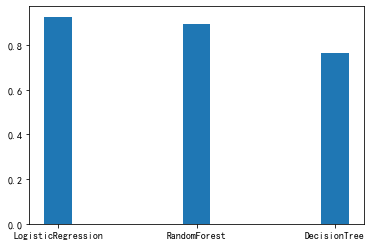

In [63]:
accs = [0.9267, 0.8922, 0.7648]
models = ['LogisticRegression', 'RandomForest', 'DecisionTree']
plt.bar(range(1, 4), accs, width=0.2)
plt.xticks(range(1, 4), models)
plt.show()

# Supervised: Different train size

Different size of training data

In [14]:
def split_data(train, num_samples_per_class=20):
    np.random.seed(1234)
    
    train_tiny = []
    unlabeled = []
    for label, group in train.groupby('label'):
        sampled_group = group.sample(n=num_samples_per_class, replace=False)
        train_tiny.append(sampled_group)
        other_indices = set(group.index) - set(sampled_group.index)
        unlabeled.append(group.loc[list(other_indices)])
    train_tiny = pd.concat(train_tiny, axis=0)
    unlabeled = pd.concat(unlabeled, axis=0)
    return train_tiny, unlabeled

In [15]:
def average_feature(w2v, tokens):
    feature = np.zeros(VEC_SIZE)
    n = 0
    for token in tokens:
        if token in w2v.wv:
            feature += w2v.wv[token]
            n += 1
    if n:
        feature /= n
    return feature

In [16]:
def experiment_size(n):
    train_tiny, unlabeled = split_data(train, num_samples_per_class=n)
    w2v_model_small = Word2Vec(
        train_tiny.tokens.values, 
        vector_size=VEC_SIZE, 
        min_count=3, 
        seed=1234
    )
    
    train_tiny['doc_vector_small'] = train_tiny.tokens.apply(lambda tokens: average_feature(w2v_model_small, tokens))
    test['doc_vector_small'] = test.tokens.apply(lambda tokens: average_feature(w2v_model_small, tokens))
    
    X_train = np.vstack(train_tiny.doc_vector_small)
    y_train = train_tiny.label
    print(X_train.shape)

    X_test = np.vstack(test.doc_vector_small)
    y_test = test.label
    
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    print(metrics.classification_report(y_test, y_test_pred, digits=4))

In [17]:
experiment_size(20)

(200, 128)
              precision    recall  f1-score   support

          体育     0.0964    0.0240    0.0384      1000
          娱乐     0.0938    0.0120    0.0213      1000
          家居     0.1333    0.0280    0.0463      1000
          房产     0.1450    0.0390    0.0615      1000
          教育     0.1477    0.9010    0.2537      1000
          时尚     0.2453    0.4660    0.3214      1000
          时政     0.1349    0.0530    0.0761      1000
          游戏     0.1132    0.0360    0.0546      1000
          科技     0.0738    0.0090    0.0160      1000
          财经     0.0777    0.0240    0.0367      1000

    accuracy                         0.1592     10000
   macro avg     0.1261    0.1592    0.0926     10000
weighted avg     0.1261    0.1592    0.0926     10000



In [18]:
experiment_size(50)

(500, 128)
              precision    recall  f1-score   support

          体育     0.2382    0.2470    0.2425      1000
          娱乐     0.0921    0.1030    0.0973      1000
          家居     0.0703    0.0360    0.0476      1000
          房产     0.1329    0.0380    0.0591      1000
          教育     0.1950    0.7430    0.3089      1000
          时尚     0.4104    0.5980    0.4868      1000
          时政     0.2907    0.1980    0.2356      1000
          游戏     0.1720    0.0270    0.0467      1000
          科技     0.1642    0.0110    0.0206      1000
          财经     0.2151    0.1880    0.2006      1000

    accuracy                         0.2189     10000
   macro avg     0.1981    0.2189    0.1746     10000
weighted avg     0.1981    0.2189    0.1746     10000



In [19]:
experiment_size(100)

(1000, 128)
              precision    recall  f1-score   support

          体育     0.5134    0.5350    0.5240      1000
          娱乐     0.3769    0.1500    0.2146      1000
          家居     0.0819    0.0420    0.0555      1000
          房产     0.2799    0.1660    0.2084      1000
          教育     0.2875    0.6980    0.4072      1000
          时尚     0.4442    0.7120    0.5471      1000
          时政     0.2383    0.2300    0.2341      1000
          游戏     0.3008    0.1820    0.2268      1000
          科技     0.2869    0.1070    0.1559      1000
          财经     0.5574    0.8250    0.6653      1000

    accuracy                         0.3647     10000
   macro avg     0.3367    0.3647    0.3239     10000
weighted avg     0.3367    0.3647    0.3239     10000



In [20]:
experiment_size(500)

(5000, 128)
              precision    recall  f1-score   support

          体育     0.9421    0.9440    0.9431      1000
          娱乐     0.8112    0.9110    0.8582      1000
          家居     0.6667    0.2400    0.3529      1000
          房产     0.5519    0.7600    0.6395      1000
          教育     0.9205    0.7180    0.8067      1000
          时尚     0.8092    0.8950    0.8500      1000
          时政     0.8338    0.8180    0.8258      1000
          游戏     0.8208    0.8290    0.8249      1000
          科技     0.6907    0.7840    0.7344      1000
          财经     0.8552    0.9630    0.9059      1000

    accuracy                         0.7862     10000
   macro avg     0.7902    0.7862    0.7741     10000
weighted avg     0.7902    0.7862    0.7741     10000



In [21]:
experiment_size(1000)

(10000, 128)
              precision    recall  f1-score   support

          体育     0.9889    0.9800    0.9844      1000
          娱乐     0.9384    0.9600    0.9491      1000
          家居     0.8526    0.4280    0.5699      1000
          房产     0.6936    0.8150    0.7494      1000
          教育     0.9191    0.8070    0.8594      1000
          时尚     0.8390    0.9380    0.8857      1000
          时政     0.8787    0.8980    0.8882      1000
          游戏     0.8720    0.8990    0.8853      1000
          科技     0.8126    0.8890    0.8491      1000
          财经     0.8319    0.9700    0.8957      1000

    accuracy                         0.8584     10000
   macro avg     0.8627    0.8584    0.8516     10000
weighted avg     0.8627    0.8584    0.8516     10000



In [64]:
accs_1 = [0.1592, 0.2189, 0.3647, 0.7862, 0.8584]

# Supervised: Different train size, but train Word2Vec on whole training data

In [22]:
w2v_model = Word2Vec.load('./w2v.model')

In [23]:
def experiment_size(n):
    train_tiny, unlabeled = split_data(train, num_samples_per_class=n)
    
    X_train = np.vstack(train_tiny.doc_vector)
    y_train = train_tiny.label
    print(X_train.shape)

    X_test = np.vstack(test.doc_vector)
    y_test = test.label
    
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    print(metrics.classification_report(y_test, y_test_pred, digits=4))

In [24]:
experiment_size(20)

(200, 128)
              precision    recall  f1-score   support

          体育     0.9917    0.9540    0.9725      1000
          娱乐     0.9638    0.9580    0.9609      1000
          家居     0.6289    0.2000    0.3035      1000
          房产     0.5344    0.8470    0.6553      1000
          教育     0.8719    0.7830    0.8251      1000
          时尚     0.8041    0.9360    0.8651      1000
          时政     0.8737    0.9130    0.8929      1000
          游戏     0.8643    0.9360    0.8987      1000
          科技     0.9059    0.7990    0.8491      1000
          财经     0.9205    0.9840    0.9512      1000

    accuracy                         0.8310     10000
   macro avg     0.8359    0.8310    0.8174     10000
weighted avg     0.8359    0.8310    0.8174     10000



In [25]:
experiment_size(50)

(500, 128)
              precision    recall  f1-score   support

          体育     0.9918    0.9680    0.9798      1000
          娱乐     0.9465    0.9550    0.9507      1000
          家居     0.7906    0.3020    0.4370      1000
          房产     0.5936    0.8150    0.6869      1000
          教育     0.8834    0.8030    0.8413      1000
          时尚     0.8165    0.9610    0.8829      1000
          时政     0.8973    0.8820    0.8896      1000
          游戏     0.8399    0.8970    0.8675      1000
          科技     0.9081    0.8400    0.8727      1000
          财经     0.8230    0.9860    0.8972      1000

    accuracy                         0.8409     10000
   macro avg     0.8491    0.8409    0.8306     10000
weighted avg     0.8491    0.8409    0.8306     10000



In [26]:
experiment_size(100)

(1000, 128)
              precision    recall  f1-score   support

          体育     0.9959    0.9720    0.9838      1000
          娱乐     0.9658    0.9610    0.9634      1000
          家居     0.8889    0.4640    0.6097      1000
          房产     0.6826    0.8410    0.7536      1000
          教育     0.9103    0.7920    0.8471      1000
          时尚     0.8602    0.9540    0.9047      1000
          时政     0.9025    0.8790    0.8906      1000
          游戏     0.8642    0.9480    0.9041      1000
          科技     0.8713    0.9210    0.8955      1000
          财经     0.8390    0.9800    0.9041      1000

    accuracy                         0.8712     10000
   macro avg     0.8781    0.8712    0.8657     10000
weighted avg     0.8781    0.8712    0.8657     10000



In [27]:
experiment_size(500)

(5000, 128)
              precision    recall  f1-score   support

          体育     0.9960    0.9840    0.9899      1000
          娱乐     0.9768    0.9700    0.9734      1000
          家居     0.9268    0.6460    0.7613      1000
          房产     0.7779    0.8580    0.8160      1000
          教育     0.9220    0.8870    0.9042      1000
          时尚     0.9089    0.9580    0.9328      1000
          时政     0.9162    0.9180    0.9171      1000
          游戏     0.9110    0.9620    0.9358      1000
          科技     0.9114    0.9570    0.9337      1000
          财经     0.8932    0.9780    0.9337      1000

    accuracy                         0.9118     10000
   macro avg     0.9140    0.9118    0.9098     10000
weighted avg     0.9140    0.9118    0.9098     10000



In [28]:
experiment_size(1000)

(10000, 128)
              precision    recall  f1-score   support

          体育     0.9950    0.9890    0.9920      1000
          娱乐     0.9798    0.9720    0.9759      1000
          家居     0.9472    0.6460    0.7681      1000
          房产     0.7888    0.8590    0.8224      1000
          教育     0.9184    0.8670    0.8920      1000
          时尚     0.9041    0.9620    0.9322      1000
          时政     0.9102    0.9330    0.9215      1000
          游戏     0.9154    0.9630    0.9386      1000
          科技     0.8968    0.9730    0.9333      1000
          财经     0.9143    0.9810    0.9465      1000

    accuracy                         0.9145     10000
   macro avg     0.9170    0.9145    0.9122     10000
weighted avg     0.9170    0.9145    0.9122     10000



In [79]:
accs_2 = [0.8310, 0.8409, 0.8712, 0.9118, 0.9145]

In [74]:
ns = [x * 10 for x in [20, 50, 100, 500, 1000]]

plt.plot(ns, accs_1, marker='.', ms=15, label='Partial')
plt.plot(ns, accs_2, marker='.', ms=15, label='Full')
plt.legend()
plt.xlabel('Train size')
plt.ylabel('Test accuracy')
plt.show()

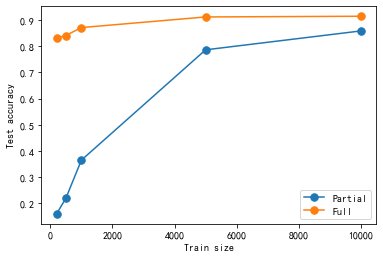

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
def experiment_size(n):
    train_tiny, unlabeled = split_data(train, num_samples_per_class=n)
    
    X_train = np.vstack(train_tiny.doc_vector)
    y_train = train_tiny.label
    print(X_train.shape)

    X_test = np.vstack(test.doc_vector)
    y_test = test.label
    
    model = RandomForestClassifier(n_estimators=30)
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    print(metrics.classification_report(y_test, y_test_pred, digits=4))

In [31]:
for n in [20, 50, 100, 500, 1000]:
    print(n)
    experiment_size(n)

20
(200, 128)
              precision    recall  f1-score   support

          体育     0.9128    0.9000    0.9063      1000
          娱乐     0.8887    0.8860    0.8873      1000
          家居     0.5855    0.2260    0.3261      1000
          房产     0.4372    0.6270    0.5152      1000
          教育     0.7816    0.7120    0.7452      1000
          时尚     0.8547    0.8590    0.8569      1000
          时政     0.8098    0.8560    0.8323      1000
          游戏     0.8017    0.8330    0.8171      1000
          科技     0.8767    0.8390    0.8574      1000
          财经     0.7728    0.9490    0.8519      1000

    accuracy                         0.7687     10000
   macro avg     0.7722    0.7687    0.7596     10000
weighted avg     0.7722    0.7687    0.7596     10000

50
(500, 128)
              precision    recall  f1-score   support

          体育     0.9685    0.9520    0.9602      1000
          娱乐     0.8710    0.8910    0.8809      1000
          家居     0.7126    0.2430    0.3624      1

# Data Augmentation

In [32]:
from TextRank import textRank

In [33]:
def data_augmentation(tfidf_feature, sentences, top_n=20, threshold=0.4, num_aug=10):
    indices = np.argsort(tfidf_feature)[::-1]
    replacement = defaultdict(list)
    for i, index in enumerate(indices):
        if i > top_n or tfidf_feature[index] < 1e-5:
            break
        token = tfidf_id_to_tokens[index]
        similars = [e[0] for e in w2v_model.wv.most_similar(token) if e[1] > threshold]
        replacement[token] = similars
    augmented = []
    for i in range(num_aug):
        a = 3
        b = len(sentences)
        if b <= a:
            continue
        k = np.random.randint(a, max(a, b))
        content = ''.join(np.random.choice(sentences, k))
        s = content
        for token, similar in replacement.items():
            if not similar:
                continue
            r = np.random.choice(similar)
            similar.remove(r)
            s = s.replace(token, r)
        augmented.append(s)
    return augmented

In [34]:
def identity_tokenizer(text):
    return text

In [35]:
N = 2048
tfidf_model = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words=None, lowercase=False, max_features=N) 
tfidf_model.fit(train.tokens)
tfidf_id_to_tokens = {v: k for k, v in tfidf_model.vocabulary_.items()}

f:\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [36]:
train_tfidf_features = tfidf_model.fit_transform(train.tokens).toarray()
test_tfidf_features = tfidf_model.transform(test.tokens).toarray()

In [37]:
with open('./data/stop_words_zh.txt', 'r', encoding='utf8') as f:
    stopwords = set(f.read().splitlines())


punctuation = string.punctuation + """！？｡＂＃＄％＆＇（）＊＋，－／：；。＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏."""

In [38]:
def clean_txt(txt):
    # txt = re.sub(r'[{}]'.format(punctuation), ' ', txt)
    tokens = list(jieba.cut(txt))
    tokens = [token for token in tokens if token.strip() and token not in stopwords]
    return tokens

In [46]:
def experiment(num_samples_per_class=20, num_aug=10):
    train_tiny, unlabeled = split_data(train, num_samples_per_class)
    x = []
    y = []
    print('Augmentation...')
    for index, row in tqdm(train_tiny.iterrows(), total=len(train_tiny)):
        tfidf_feature = train_tfidf_features[index]
        content = ' '.join(row['tokens'])
        label = row['label']

        t = textRank.TextRank(row['content'], pr_config={'alpha': 0.85, 'max_iter': 100})
        sentences = t.get_n_sentences(10)
        sentences = [e[0] for e in sentences]

        augmented = data_augmentation(tfidf_feature, sentences, num_aug=num_aug)
        augmented = [clean_txt(e) for e in augmented]
        augmented.append(row['tokens'])

        x.extend(augmented)
        y.extend([label] * len(augmented))
        
    augmented_df = pd.DataFrame({
        'tokens': [str(e) for e in x],
        'label': y
    })
    augmented_df['tokens'] = augmented_df['tokens'].apply(eval)
    augmented_df['doc_vector'] = augmented_df.tokens.apply(lambda tokens: average_feature(w2v_model, tokens))
    
    X_train = np.vstack(augmented_df.doc_vector)
    y_train = augmented_df.label
    
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    print(metrics.classification_report(y_test, y_test_pred, digits=4))

In [40]:
X_test = np.vstack(test.doc_vector)
y_test = test.label

In [41]:
experiment()

Augmentation...


  0%|          | 0/200 [00:00<?, ?it/s]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hp\AppData\Local\Temp\jieba.cache
Loading model cost 0.961 seconds.
Prefix dict has been built successfully.


              precision    recall  f1-score   support

          体育     0.9918    0.9640    0.9777      1000
          娱乐     0.9694    0.9500    0.9596      1000
          家居     0.8412    0.1960    0.3179      1000
          房产     0.5237    0.8410    0.6454      1000
          教育     0.8039    0.8280    0.8158      1000
          时尚     0.8170    0.9600    0.8828      1000
          时政     0.9222    0.8540    0.8868      1000
          游戏     0.8950    0.9460    0.9198      1000
          科技     0.9091    0.8900    0.8994      1000
          财经     0.9443    0.9840    0.9638      1000

    accuracy                         0.8413     10000
   macro avg     0.8618    0.8413    0.8269     10000
weighted avg     0.8618    0.8413    0.8269     10000



In [42]:
experiment(50)

Augmentation...


  0%|          | 0/500 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          体育     0.9948    0.9650    0.9797      1000
          娱乐     0.9672    0.9430    0.9549      1000
          家居     0.9054    0.4020    0.5568      1000
          房产     0.6143    0.8760    0.7222      1000
          教育     0.8924    0.8130    0.8509      1000
          时尚     0.8508    0.9750    0.9087      1000
          时政     0.9446    0.8010    0.8669      1000
          游戏     0.8464    0.9480    0.8943      1000
          科技     0.9115    0.9060    0.9087      1000
          财经     0.8448    0.9850    0.9095      1000

    accuracy                         0.8614     10000
   macro avg     0.8772    0.8614    0.8553     10000
weighted avg     0.8772    0.8614    0.8553     10000



In [43]:
experiment(100)

Augmentation...


  0%|          | 0/1000 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          体育     0.9969    0.9750    0.9858      1000
          娱乐     0.9768    0.9700    0.9734      1000
          家居     0.9396    0.5440    0.6890      1000
          房产     0.6945    0.8890    0.7798      1000
          教育     0.9134    0.7910    0.8478      1000
          时尚     0.8479    0.9700    0.9049      1000
          时政     0.9463    0.8110    0.8735      1000
          游戏     0.8816    0.9680    0.9228      1000
          科技     0.8726    0.9450    0.9073      1000
          财经     0.8743    0.9810    0.9246      1000

    accuracy                         0.8844     10000
   macro avg     0.8944    0.8844    0.8809     10000
weighted avg     0.8944    0.8844    0.8809     10000



In [44]:
experiment(500)

Augmentation...


  0%|          | 0/5000 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          体育     0.9900    0.9920    0.9910      1000
          娱乐     0.9729    0.9700    0.9715      1000
          家居     0.9616    0.6760    0.7939      1000
          房产     0.7394    0.9050    0.8138      1000
          教育     0.9090    0.8590    0.8833      1000
          时尚     0.9293    0.9600    0.9444      1000
          时政     0.9579    0.8650    0.9091      1000
          游戏     0.8885    0.9800    0.9320      1000
          科技     0.9201    0.9560    0.9377      1000
          财经     0.9324    0.9800    0.9556      1000

    accuracy                         0.9143     10000
   macro avg     0.9201    0.9143    0.9132     10000
weighted avg     0.9201    0.9143    0.9132     10000



In [47]:
experiment(1000, num_aug=2)

Augmentation...


  0%|          | 0/10000 [00:00<?, ?it/s]

              precision    recall  f1-score   support

          体育     0.9920    0.9900    0.9910      1000
          娱乐     0.9760    0.9780    0.9770      1000
          家居     0.9596    0.6420    0.7693      1000
          房产     0.7574    0.8900    0.8184      1000
          教育     0.9189    0.8380    0.8766      1000
          时尚     0.9163    0.9630    0.9391      1000
          时政     0.9400    0.9090    0.9243      1000
          游戏     0.8811    0.9780    0.9270      1000
          科技     0.9193    0.9680    0.9430      1000
          财经     0.9276    0.9860    0.9559      1000

    accuracy                         0.9142     10000
   macro avg     0.9188    0.9142    0.9122     10000
weighted avg     0.9188    0.9142    0.9122     10000



In [78]:
accs_3 = [0.8413     , 0.8614, 0.8844, 0.9143, 0.9142]

In [82]:
accs_2

[0.831, 0.8409, 0.8712, 0.9118, 0.9145]

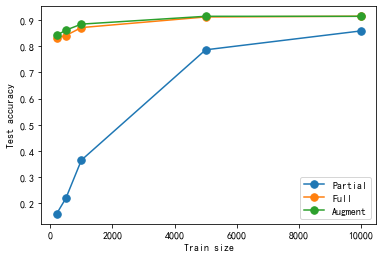

In [80]:
ns = [x * 10 for x in [20, 50, 100, 500, 1000]]

plt.plot(ns, accs_1, marker='.', ms=15, label='Partial')
plt.plot(ns, accs_2, marker='.', ms=15, label='Full')
plt.plot(ns, accs_3, marker='.', ms=15, label='Augment')
plt.legend()
plt.xlabel('Train size')
plt.ylabel('Test accuracy')
plt.show()

In [81]:
ns

[200, 500, 1000, 5000, 10000]